# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm as tqdm_notebook
from sklearn.preprocessing import MinMaxScaler

# Data Preperation

```
# Exploratory Data Analysis
```



In [5]:
df = pd.read_csv("/content/household_power_consumption_household_power_consumption.csv")

In [6]:
df.head()
df.shape #9 columns

(260640, 9)

In [7]:
df.head(20)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,1/1/07,0:00:00,2.58,0.136,241.97,10.6,0,0,0.0
1,1/1/07,0:01:00,2.552,0.1,241.75,10.4,0,0,0.0
2,1/1/07,0:02:00,2.55,0.1,241.64,10.4,0,0,0.0
3,1/1/07,0:03:00,2.55,0.1,241.71,10.4,0,0,0.0
4,1/1/07,0:04:00,2.554,0.1,241.98,10.4,0,0,0.0
5,1/1/07,0:05:00,2.55,0.1,241.83,10.4,0,0,0.0
6,1/1/07,0:06:00,2.534,0.096,241.07,10.4,0,0,0.0
7,1/1/07,0:07:00,2.484,0,241.29,10.2,0,0,0.0
8,1/1/07,0:08:00,2.468,0,241.23,10.2,0,0,0.0
9,1/1/07,0:09:00,2.486,0,242.18,10.2,0,0,0.0


In [8]:
global_active_power = df.pop('Global_active_power')
global_reactive_power = df.pop('Global_reactive_power')
df['Global_active_power'] = global_active_power
df['Global_reactive_power'] = global_reactive_power #adding them tot he end of the result

In [9]:
df.head()

,Date,Time,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Global_active_power,Global_reactive_power
0,1/1/07,0:00:00,241.97,10.6,0,0,0.0,2.58,0.136
1,1/1/07,0:01:00,241.75,10.4,0,0,0.0,2.552,0.1
2,1/1/07,0:02:00,241.64,10.4,0,0,0.0,2.55,0.1
3,1/1/07,0:03:00,241.71,10.4,0,0,0.0,2.55,0.1
4,1/1/07,0:04:00,241.98,10.4,0,0,0.0,2.554,0.1


In [10]:
# df.dtypes
df.infer_objects().dtypes

Date                      object
Time                      object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
Global_active_power       object
Global_reactive_power     object
dtype: object

In [11]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['DateTime'] = pd.to_datetime(df['Date'].dt.strftime('%Y-%m-%d') + ' ' + df['Time'])

df.set_index('DateTime', inplace=True)

df.drop(['Date', 'Time'], axis=1, inplace=True)

<ipython-input-11-2a3e67abc02f>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)


In [12]:
#Object to numeric datatype
for i in range(len(df.columns)):
    try:
      df[df.columns[i]] = pd.to_numeric(df[df.columns[i]], errors='coerce')
    except Exception as e:
      pass


In [13]:
df

,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Global_active_power,Global_reactive_power
DateTime,,,,,,,
2007-01-01 00:00:00,241.97,10.6,0.0,0.0,0.0,2.580,0.136
2007-01-01 00:01:00,241.75,10.4,0.0,0.0,0.0,2.552,0.100
2007-01-01 00:02:00,241.64,10.4,0.0,0.0,0.0,2.550,0.100
2007-01-01 00:03:00,241.71,10.4,0.0,0.0,0.0,2.550,0.100
2007-01-01 00:04:00,241.98,10.4,0.0,0.0,0.0,2.554,0.100
...,...,...,...,...,...,...,...
2007-06-30 23:55:00,239.01,12.0,0.0,0.0,18.0,2.880,0.360
2007-06-30 23:56:00,238.86,12.2,0.0,0.0,17.0,2.892,0.358
2007-06-30 23:57:00,239.05,12.0,0.0,0.0,18.0,2.882,0.280


In [14]:
# df_default = df[1::60]
# Replace '?' with NaN (if this step is necessary)
# df.replace('?', np.nan, inplace=True)

# Drop rows with any NaN values
# df.dropna(inplace=True)

In [15]:
df .infer_objects().dtypes

Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
Global_active_power      float64
Global_reactive_power    float64
dtype: object

<Axes: xlabel='DateTime'>

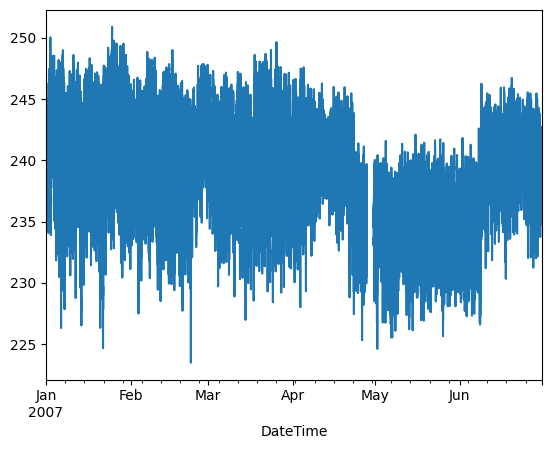

In [16]:
tempV = df['Voltage']
tempV.plot()

<Axes: xlabel='DateTime'>

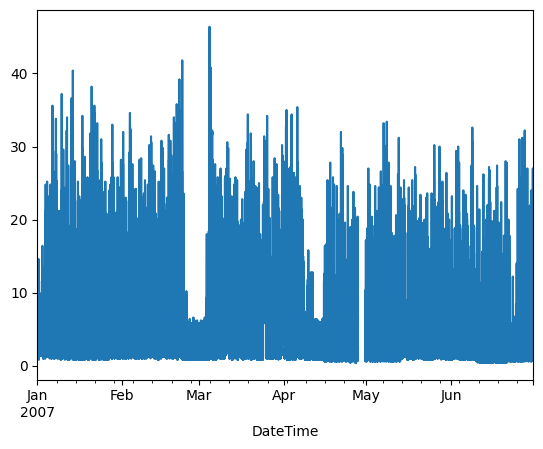

In [17]:
tempG = df['Global_intensity']
tempG.plot()

<Axes: xlabel='DateTime'>

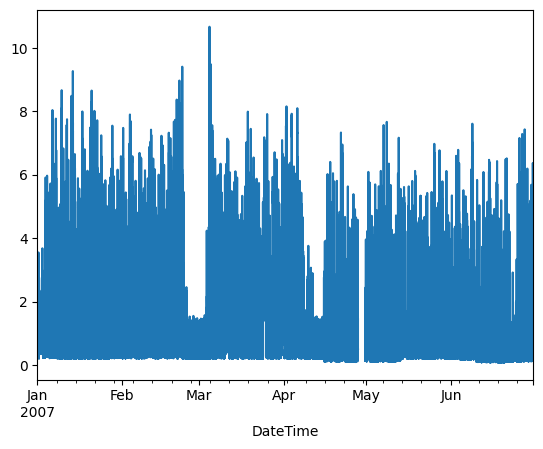

In [18]:
tempP = df['Global_active_power']
tempP.plot()

<Axes: xlabel='DateTime'>

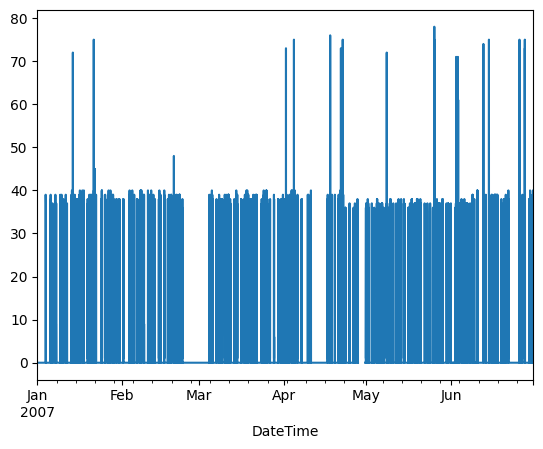

In [19]:
tempS = df['Sub_metering_1']
tempS.plot()

<Axes: xlabel='DateTime'>

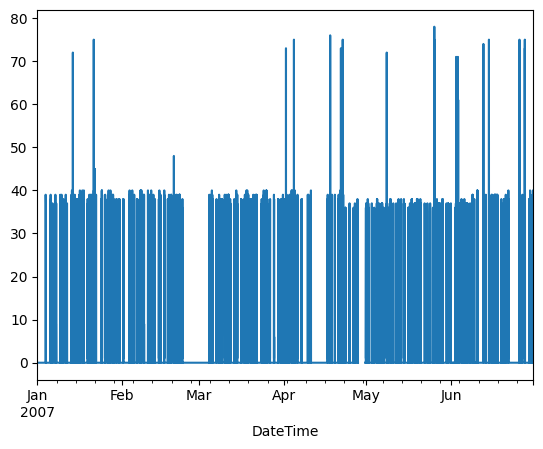

In [20]:
tempS2 = df['Sub_metering_2']
tempS.plot()

<Axes: xlabel='DateTime'>

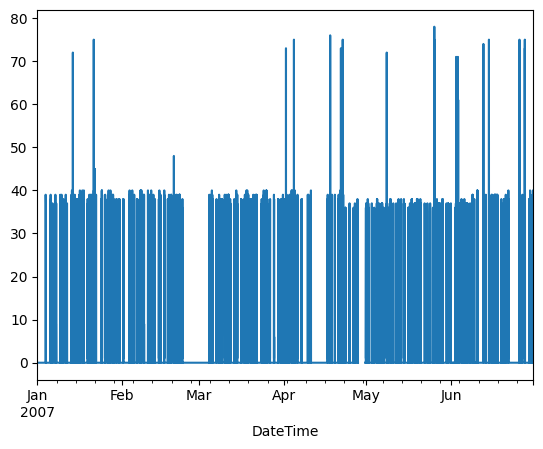

In [21]:
tempS3 = df['Sub_metering_3']
tempS.plot()

In [22]:
df_group_1 = df[['Voltage',	'Global_intensity',	'Sub_metering_1', 'Global_active_power','Global_reactive_power']]
df_group_2 = df[['Voltage',	'Global_intensity',	'Sub_metering_2', 'Global_active_power','Global_reactive_power']]
df_group_3 = df[['Voltage',	'Global_intensity',	'Sub_metering_3', 'Global_active_power','Global_reactive_power',]]

In [23]:
# df_sub_metering_1.describe()
# df_sub_metering_2.describe()
df_group_3.describe()

,Voltage,Global_intensity,Sub_metering_3,Global_active_power,Global_reactive_power
count,256869.000000,256869.000000,256869.000000,256869.000000,256869.000000
mean,239.208981,4.974755,5.831825,1.164937,0.123729
std,3.592793,4.999493,8.186709,1.181832,0.111872
min,223.490000,0.400000,0.000000,0.082000,0.000000
25%,236.650000,1.400000,0.000000,0.296000,0.000000
50%,239.610000,2.600000,0.000000,0.564000,0.104000
75%,241.810000,6.800000,17.000000,1.606000,0.194000
max,250.890000,46.400000,20.000000,10.670000,1.148000


In [24]:
df_group_3

,Voltage,Global_intensity,Sub_metering_3,Global_active_power,Global_reactive_power
DateTime,,,,,
2007-01-01 00:00:00,241.97,10.6,0.0,2.580,0.136
2007-01-01 00:01:00,241.75,10.4,0.0,2.552,0.100
2007-01-01 00:02:00,241.64,10.4,0.0,2.550,0.100
2007-01-01 00:03:00,241.71,10.4,0.0,2.550,0.100
2007-01-01 00:04:00,241.98,10.4,0.0,2.554,0.100
...,...,...,...,...,...
2007-06-30 23:55:00,239.01,12.0,18.0,2.880,0.360
2007-06-30 23:56:00,238.86,12.2,17.0,2.892,0.358
2007-06-30 23:57:00,239.05,12.0,18.0,2.882,0.280


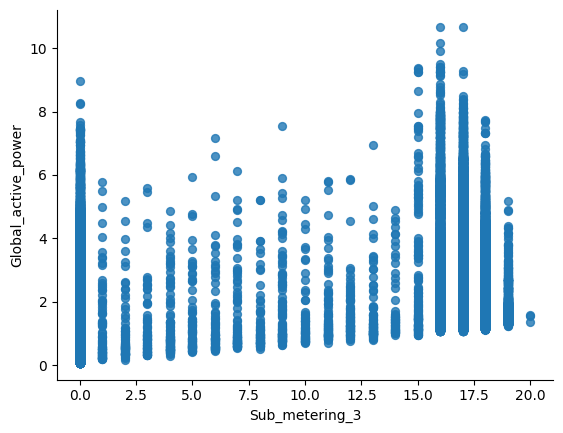

In [25]:
df_group_3.plot(kind='scatter', x='Sub_metering_3', y='Global_active_power', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

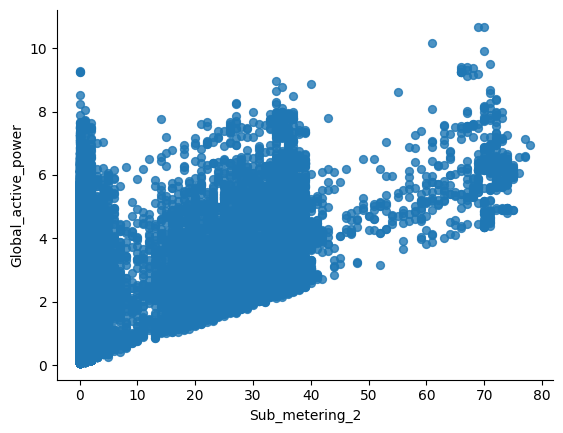

In [26]:
df_group_2.plot(kind='scatter', x='Sub_metering_2', y='Global_active_power', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

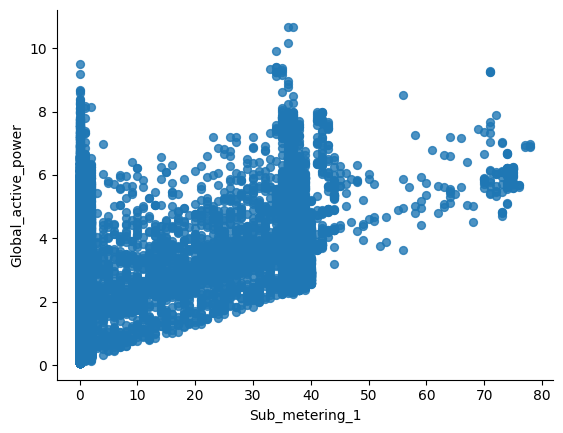

In [27]:
df_group_1.plot(kind='scatter', x='Sub_metering_1', y='Global_active_power', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

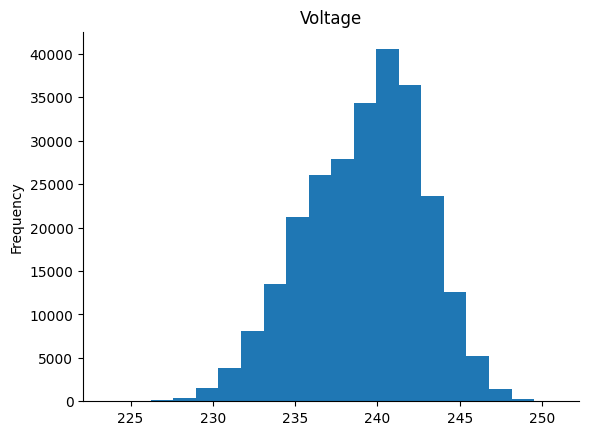

In [28]:
df_group_3['Voltage'].plot(kind='hist', bins=20, title='Voltage')
plt.gca().spines[['top', 'right',]].set_visible(False)

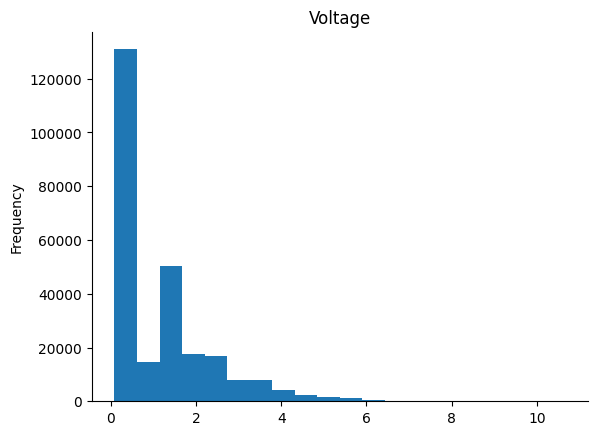

In [29]:
df_group_3['Global_active_power'].plot(kind='hist', bins=20, title='Voltage')
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: xlabel='DateTime'>

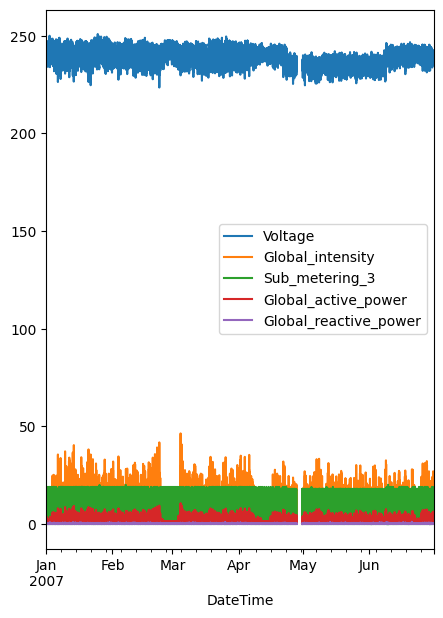

In [30]:
df_group_3.plot(figsize=(5,7))

*18th june*

In [31]:
df.shape
print(df.isnull().sum())
df = df.dropna(subset=['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'])
df

Voltage                  3771
Global_intensity         3771
Sub_metering_1           3771
Sub_metering_2           3771
Sub_metering_3           3771
Global_active_power      3771
Global_reactive_power    3771
dtype: int64


,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Global_active_power,Global_reactive_power
DateTime,,,,,,,
2007-01-01 00:00:00,241.97,10.6,0.0,0.0,0.0,2.580,0.136
2007-01-01 00:01:00,241.75,10.4,0.0,0.0,0.0,2.552,0.100
2007-01-01 00:02:00,241.64,10.4,0.0,0.0,0.0,2.550,0.100
2007-01-01 00:03:00,241.71,10.4,0.0,0.0,0.0,2.550,0.100
2007-01-01 00:04:00,241.98,10.4,0.0,0.0,0.0,2.554,0.100
...,...,...,...,...,...,...,...
2007-06-30 23:55:00,239.01,12.0,0.0,0.0,18.0,2.880,0.360
2007-06-30 23:56:00,238.86,12.2,0.0,0.0,17.0,2.892,0.358
2007-06-30 23:57:00,239.05,12.0,0.0,0.0,18.0,2.882,0.280


<Axes: xlabel='DateTime'>

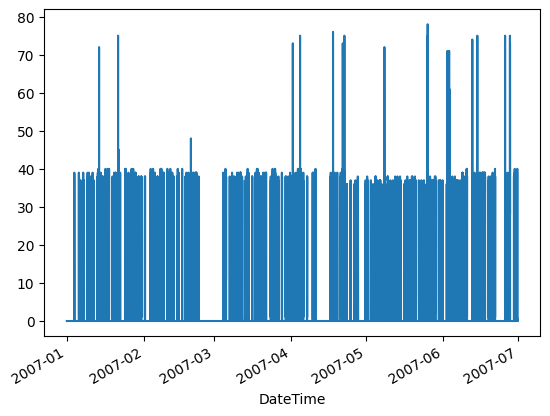

In [32]:
temp = df['Sub_metering_1']
temp.plot()

# Models

In [33]:
def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [34]:
WINDOW_SIZE = 5
X1, y1 = df_to_X_y(temp, WINDOW_SIZE)
X1.shape, y1.shape

((256864, 5, 1), (256864,))

In [35]:
X_train1, y_train1 = X1[:180000], y1[:180000]
X_val1, y_val1 = X1[180000:220000], y1[180000:220000]
X_test1, y_test1 = X1[220000:], y1[220000:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((180000, 5, 1), (180000,), (40000, 5, 1), (40000,), (36864, 5, 1), (36864,))

In [36]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train1 = scaler.fit_transform(X_train1.reshape(-1, X_train1.shape[-1])).reshape(X_train1.shape)
X_val1 = scaler.transform(X_val1.reshape(-1, X_val1.shape[-1])).reshape(X_val1.shape)
X_test1 = scaler.transform(X_test1.reshape(-1, X_test1.shape[-1])).reshape(X_test1.shape)

In [37]:
df['DateTime'] = df.index
df = df[['DateTime'] + [col for col in df.columns if col != 'DateTime']]

<ipython-input-37-5c93c8cc9203>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DateTime'] = df.index


In [38]:
temp

DateTime
2007-01-01 00:00:00    0.0
2007-01-01 00:01:00    0.0
2007-01-01 00:02:00    0.0
2007-01-01 00:03:00    0.0
2007-01-01 00:04:00    0.0
                      ... 
2007-06-30 23:55:00    0.0
2007-06-30 23:56:00    0.0
2007-06-30 23:57:00    0.0
2007-06-30 23:58:00    0.0
2007-06-30 23:59:00    0.0
Name: Sub_metering_1, Length: 256869, dtype: float64

In [39]:
df

,DateTime,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Global_active_power,Global_reactive_power
DateTime,,,,,,,,
2007-01-01 00:00:00,2007-01-01 00:00:00,241.97,10.6,0.0,0.0,0.0,2.580,0.136
2007-01-01 00:01:00,2007-01-01 00:01:00,241.75,10.4,0.0,0.0,0.0,2.552,0.100
2007-01-01 00:02:00,2007-01-01 00:02:00,241.64,10.4,0.0,0.0,0.0,2.550,0.100
2007-01-01 00:03:00,2007-01-01 00:03:00,241.71,10.4,0.0,0.0,0.0,2.550,0.100
2007-01-01 00:04:00,2007-01-01 00:04:00,241.98,10.4,0.0,0.0,0.0,2.554,0.100
...,...,...,...,...,...,...,...,...
2007-06-30 23:55:00,2007-06-30 23:55:00,239.01,12.0,0.0,0.0,18.0,2.880,0.360
2007-06-30 23:56:00,2007-06-30 23:56:00,238.86,12.2,0.0,0.0,17.0,2.892,0.358
2007-06-30 23:57:00,2007-06-30 23:57:00,239.05,12.0,0.0,0.0,18.0,2.882,0.280


In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam


In [41]:
model1 = Sequential()
model1.add(InputLayer((5, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17425 (68.07 KB)
Trainable params: 17425 (68.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [43]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [44]:
temp.describe()

count    256869.000000
mean          1.332481
std           6.704970
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          78.000000
Name: Sub_metering_1, dtype: float64

In [45]:
#HELP NEEDED for standardisation

In [46]:
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp1])

Epoch 1/10
5625/5625 [==============================] - 33s 5ms/step - loss: 23.5065 - root_mean_squared_error: 4.8484 - val_loss: 27.3560 - val_root_mean_squared_error: 5.2303
Epoch 2/10
5625/5625 [==============================] - 31s 5ms/step - loss: 18.0967 - root_mean_squared_error: 4.2540 - val_loss: 26.1538 - val_root_mean_squared_error: 5.1141
Epoch 3/10
5625/5625 [==============================] - 30s 5ms/step - loss: 17.1461 - root_mean_squared_error: 4.1408 - val_loss: 24.3947 - val_root_mean_squared_error: 4.9391
Epoch 4/10
5625/5625 [==============================] - 29s 5ms/step - loss: 15.0298 - root_mean_squared_error: 3.8768 - val_loss: 20.6233 - val_root_mean_squared_error: 4.5413
Epoch 5/10
5625/5625 [==============================] - 30s 5ms/step - loss: 11.2897 - root_mean_squared_error: 3.3600 - val_loss: 14.2069 - val_root_mean_squared_error: 3.7692
Epoch 6/10
5625/5625 [==============================] - 30s 5ms/step - loss: 7.7082 - root_mean_squared_error: 2.77

In [47]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

In [48]:
train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

5625/5625 [==============================] - 13s 2ms/step


,Train Predictions,Actuals
0,-0.009897,0.0
1,-0.009897,0.0
2,-0.009897,0.0
3,-0.009897,0.0
4,-0.009897,0.0
...,...,...
179995,-0.009897,2.0
179996,2.577483,1.0
179997,0.987476,1.0
179998,1.071643,2.0


In [49]:
val_predictions = model1.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val1})
val_results

1250/1250 [==============================] - 4s 3ms/step


,Val Predictions,Actuals
0,1.533968,1.0
1,1.500614,1.0
2,1.790838,1.0
3,1.795599,2.0
4,2.849999,1.0
...,...,...
39995,-0.009897,0.0
39996,-0.009897,0.0
39997,-0.009897,0.0
39998,-0.009897,0.0


In [51]:
test_predictions = model1.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Train Predictions':test_predictions, 'Actuals':y_test1})
test_results

1152/1152 [==============================] - 4s 4ms/step


,Train Predictions,Actuals
0,-0.009897,0.0
1,-0.009897,0.0
2,-0.009897,0.0
3,-0.009897,0.0
4,-0.009897,0.0
...,...,...
36859,-0.009897,0.0
36860,-0.009897,0.0
36861,-0.009897,0.0
36862,-0.009897,0.0


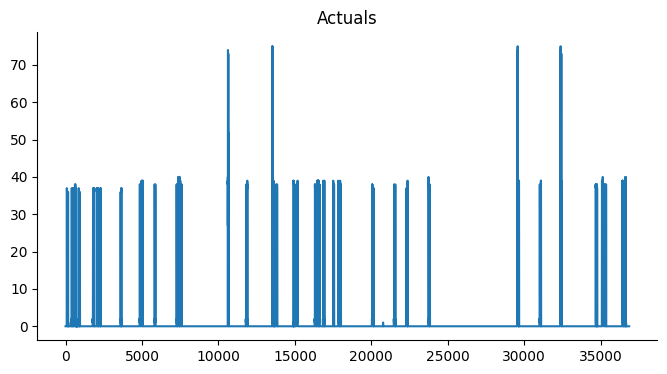

In [53]:
# @title Actuals

from matplotlib import pyplot as plt
test_results['Actuals'].plot(kind='line', figsize=(8, 4), title='Actuals')
plt.gca().spines[['top', 'right']].set_visible(False)

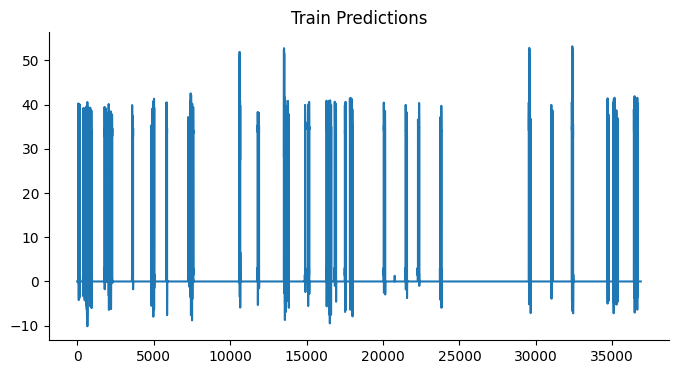

In [52]:
# @title Train Predictions

from matplotlib import pyplot as plt
test_results['Train Predictions'].plot(kind='line', figsize=(8, 4), title='Train Predictions')
plt.gca().spines[['top', 'right']].set_visible(False)

*Layer 2*

In [54]:
from sklearn.metrics import mean_squared_error as mse

def plot_predictions1(model, X, y, start=0, end=100):
  predictions = model.predict(X).flatten()
  df = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y})
  plt.plot(df['Predictions'][start:end])
  plt.plot(df['Actuals'][start:end])
  return df, mse(y, predictions)

1152/1152 [==============================] - 4s 3ms/step


(       Predictions  Actuals
 0        -0.009897      0.0
 1        -0.009897      0.0
 2        -0.009897      0.0
 3        -0.009897      0.0
 4        -0.009897      0.0
 ...            ...      ...
 36859    -0.009897      0.0
 36860    -0.009897      0.0
 36861    -0.009897      0.0
 36862    -0.009897      0.0
 36863    -0.009897      0.0
 
 [36864 rows x 2 columns],
 7.5921827375032835)

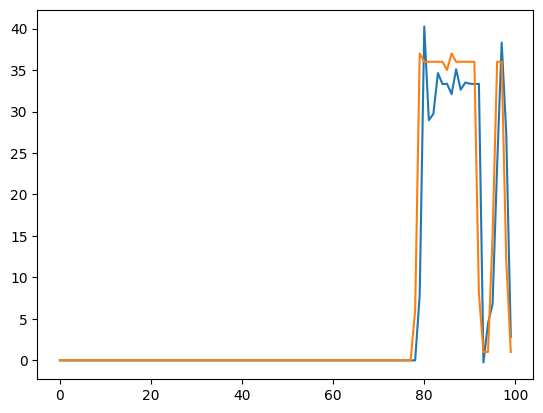

In [55]:
plot_predictions1(model1, X_test1, y_test1)

In [56]:
model2 = Sequential()
model2.add(InputLayer((5, 1)))
model2.add(Conv1D(64, kernel_size=2))
model2.add(Flatten())
model2.add(Dense(8, 'relu'))
model2.add(Dense(1, 'linear'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 4, 64)             192       
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 8)                 2056      
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 2257 (8.82 KB)
Trainable params: 2257 (8.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [57]:
cp2 = ModelCheckpoint('model2/', save_best_only=True)
model2.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [58]:
model2.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp2])

Epoch 1/10
5625/5625 [==============================] - 14s 2ms/step - loss: 22.0140 - root_mean_squared_error: 4.6919 - val_loss: 18.5765 - val_root_mean_squared_error: 4.3101
Epoch 2/10
5625/5625 [==============================] - 14s 3ms/step - loss: 10.6857 - root_mean_squared_error: 3.2689 - val_loss: 13.9273 - val_root_mean_squared_error: 3.7319
Epoch 3/10
5625/5625 [==============================] - 14s 3ms/step - loss: 8.2375 - root_mean_squared_error: 2.8701 - val_loss: 11.2716 - val_root_mean_squared_error: 3.3573
Epoch 4/10
5625/5625 [==============================] - 13s 2ms/step - loss: 6.9364 - root_mean_squared_error: 2.6337 - val_loss: 9.8616 - val_root_mean_squared_error: 3.1403
Epoch 5/10
5625/5625 [==============================] - 13s 2ms/step - loss: 6.3168 - root_mean_squared_error: 2.5133 - val_loss: 9.2582 - val_root_mean_squared_error: 3.0427
Epoch 6/10
5625/5625 [==============================] - 13s 2ms/step - loss: 6.0705 - root_mean_squared_error: 2.4638 - 

In [61]:
train_predictions = model2.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

5625/5625 [==============================] - 8s 1ms/step


,Train Predictions,Actuals
0,0.104012,0.0
1,0.104012,0.0
2,0.104012,0.0
3,0.104012,0.0
4,0.104012,0.0
...,...,...
179995,0.104012,2.0
179996,2.445651,1.0
179997,0.590224,1.0
179998,0.748578,2.0


In [62]:
val_predictions = model2.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val1})
val_results

1250/1250 [==============================] - 4s 3ms/step


,Val Predictions,Actuals
0,0.741116,1.0
1,0.959510,1.0
2,1.230479,1.0
3,1.083419,2.0
4,2.222305,1.0
...,...,...
39995,0.104012,0.0
39996,0.104012,0.0
39997,0.104012,0.0
39998,0.104012,0.0


In [63]:
test_predictions = model1.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Train Predictions':test_predictions, 'Actuals':y_test1})
test_results

1152/1152 [==============================] - 3s 2ms/step


,Train Predictions,Actuals
0,-0.009897,0.0
1,-0.009897,0.0
2,-0.009897,0.0
3,-0.009897,0.0
4,-0.009897,0.0
...,...,...
36859,-0.009897,0.0
36860,-0.009897,0.0
36861,-0.009897,0.0
36862,-0.009897,0.0


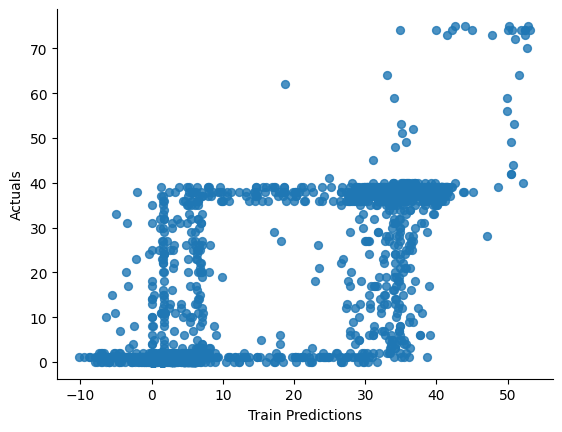

In [64]:
# @title Train Predictions vs Actuals

from matplotlib import pyplot as plt
test_results.plot(kind='scatter', x='Train Predictions', y='Actuals', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

*Layer 3*

In [59]:
model3 = Sequential()
model3.add(InputLayer((5, 1)))
model3.add(GRU(64))
model3.add(Dense(8, 'relu'))
model3.add(Dense(1, 'linear'))
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 64)                12864     
                                                                 
 dense_4 (Dense)             (None, 8)                 520       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 13393 (52.32 KB)
Trainable params: 13393 (52.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


1152/1152 [==============================] - 2s 1ms/step


(       Predictions  Actuals
 0         0.104012      0.0
 1         0.104012      0.0
 2         0.104012      0.0
 3         0.104012      0.0
 4         0.104012      0.0
 ...            ...      ...
 36859     0.104012      0.0
 36860     0.104012      0.0
 36861     0.104012      0.0
 36862     0.104012      0.0
 36863     0.104012      0.0
 
 [36864 rows x 2 columns],
 7.978820518803141)

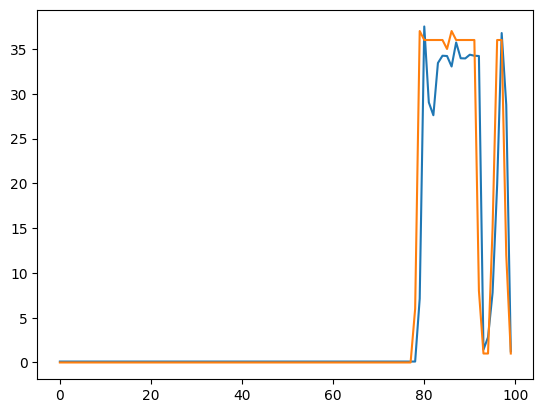

In [65]:
plot_predictions1(model2, X_test1, y_test1)

In [66]:
cp3 = ModelCheckpoint('model3/', save_best_only=True)
model3.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [67]:
model3.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp3])

Epoch 1/10
5625/5625 [==============================] - 34s 6ms/step - loss: 22.0066 - root_mean_squared_error: 4.6911 - val_loss: 26.9740 - val_root_mean_squared_error: 5.1936
Epoch 2/10
5625/5625 [==============================] - 30s 5ms/step - loss: 17.7810 - root_mean_squared_error: 4.2167 - val_loss: 25.6122 - val_root_mean_squared_error: 5.0609
Epoch 3/10
5625/5625 [==============================] - 31s 5ms/step - loss: 14.0338 - root_mean_squared_error: 3.7462 - val_loss: 17.3420 - val_root_mean_squared_error: 4.1644
Epoch 4/10
5625/5625 [==============================] - 32s 6ms/step - loss: 9.6570 - root_mean_squared_error: 3.1076 - val_loss: 12.3781 - val_root_mean_squared_error: 3.5183
Epoch 5/10
5625/5625 [==============================] - 30s 5ms/step - loss: 7.3753 - root_mean_squared_error: 2.7157 - val_loss: 9.9661 - val_root_mean_squared_error: 3.1569
Epoch 6/10
5625/5625 [==============================] - 29s 5ms/step - loss: 6.2693 - root_mean_squared_error: 2.5039 

1152/1152 [==============================] - 3s 2ms/step


(       Predictions  Actuals
 0        -0.072112      0.0
 1        -0.072112      0.0
 2        -0.072112      0.0
 3        -0.072112      0.0
 4        -0.072112      0.0
 ...            ...      ...
 36859    -0.072112      0.0
 36860    -0.072112      0.0
 36861    -0.072112      0.0
 36862    -0.072111      0.0
 36863    -0.072111      0.0
 
 [36864 rows x 2 columns],
 7.691230133337435)

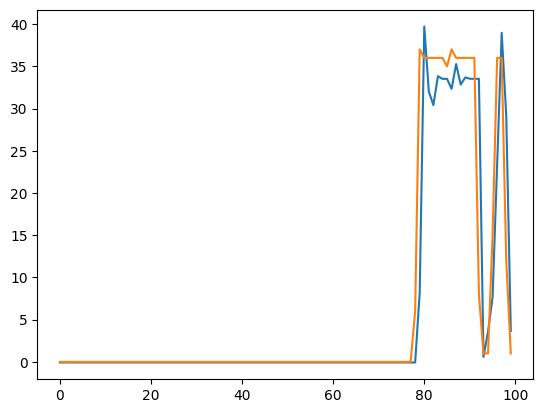

In [68]:
plot_predictions1(model3, X_test1, y_test1)

In [69]:
#Creating precise timestamps
temp_df = pd.DataFrame({'Sub_1':temp})
temp_df['Seconds'] = temp_df.index.map(pd.Timestamp.timestamp)
temp_df

,Sub_1,Seconds
DateTime,,
2007-01-01 00:00:00,0.0,1.167610e+09
2007-01-01 00:01:00,0.0,1.167610e+09
2007-01-01 00:02:00,0.0,1.167610e+09
2007-01-01 00:03:00,0.0,1.167610e+09
2007-01-01 00:04:00,0.0,1.167610e+09
...,...,...
2007-06-30 23:55:00,0.0,1.183248e+09
2007-06-30 23:56:00,0.0,1.183248e+09
2007-06-30 23:57:00,0.0,1.183248e+09


In [70]:
day = 60*60*24
year = 365.2425*day

temp_df['Day sin'] = np.sin(temp_df['Seconds'] * (2* np.pi / day))
temp_df['Day cos'] = np.cos(temp_df['Seconds'] * (2 * np.pi / day))
temp_df['Year sin'] = np.sin(temp_df['Seconds'] * (2 * np.pi / year))
temp_df['Year cos'] = np.cos(temp_df['Seconds'] * (2 * np.pi / year))
temp_df.head()

,Sub_1,Seconds,Day sin,Day cos,Year sin,Year cos
DateTime,,,,,,
2007-01-01 00:00:00,0.0,1.167610e+09,-7.946541e-13,1.000000,0.000473,1.0
2007-01-01 00:01:00,0.0,1.167610e+09,4.363309e-03,0.999990,0.000485,1.0
2007-01-01 00:02:00,0.0,1.167610e+09,8.726535e-03,0.999962,0.000497,1.0
2007-01-01 00:03:00,0.0,1.167610e+09,1.308960e-02,0.999914,0.000509,1.0
2007-01-01 00:04:00,0.0,1.167610e+09,1.745241e-02,0.999848,0.000521,1.0


In [71]:
temp_df = temp_df.drop('Seconds', axis=1)
temp_df.head()

,Sub_1,Day sin,Day cos,Year sin,Year cos
DateTime,,,,,
2007-01-01 00:00:00,0.0,-7.946541e-13,1.000000,0.000473,1.0
2007-01-01 00:01:00,0.0,4.363309e-03,0.999990,0.000485,1.0
2007-01-01 00:02:00,0.0,8.726535e-03,0.999962,0.000497,1.0
2007-01-01 00:03:00,0.0,1.308960e-02,0.999914,0.000509,1.0
2007-01-01 00:04:00,0.0,1.745241e-02,0.999848,0.000521,1.0


In [72]:
def df_to_X_y2(df, window_size=6):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size][0]
    y.append(label)
  return np.array(X), np.array(y)

In [73]:
X2, y2 = df_to_X_y2(temp_df)
X2.shape, y2.shape

((256863, 6, 5), (256863,))

In [74]:
# X2_train, y2_train = X2[:60000], y2[:60000]
# X2_val, y2_val = X2[60000:65000], y2[60000:65000]
# X2_test, y2_test = X2[65000:], y2[65000:]
# X2_train.shape, y2_train.shape, X2_val.shape, y2_val.shape, X2_test.shape, y2_test.shape

In [75]:
X_train2, y_train2 = X2[:180000], y2[:180000]
X_val2, y_val2 = X2[180000:220000], y2[180000:220000]
X_test2, y_test2 = X2[220000:], y2[220000:]
X_train2.shape, y_train2.shape, X_val2.shape, y_val2.shape, X_test2.shape, y_test2.shape

((180000, 6, 5), (180000,), (40000, 6, 5), (40000,), (36863, 6, 5), (36863,))

In [76]:
temp_training_mean = np.mean(X_train2[:, :, 0])
temp_training_std = np.std(X_train2[:, :, 0])

def preprocess(X):
  X[:, :, 0] = (X[:, :, 0] - temp_training_mean) / temp_training_std
  return X

In [77]:
preprocess(X_train2)
preprocess(X_val2)
preprocess(X_test2)

array([[[-0.19181519,  0.74021813, -0.67236681,  0.45143198,
         -0.89230553],
        [-0.19181519,  0.73727734, -0.67559021,  0.45142132,
         -0.89231093],
        [-0.19181519,  0.73432251, -0.67880075,  0.45141066,
         -0.89231632],
        [-0.19181519,  0.7313537 , -0.68199836,  0.4514    ,
         -0.89232171],
        [-0.19181519,  0.72837097, -0.68518299,  0.45138934,
         -0.89232711],
        [-0.19181519,  0.72537437, -0.68835458,  0.45137868,
         -0.8923325 ]],

       [[-0.19181519,  0.73727734, -0.67559021,  0.45142132,
         -0.89231093],
        [-0.19181519,  0.73432251, -0.67880075,  0.45141066,
         -0.89231632],
        [-0.19181519,  0.7313537 , -0.68199836,  0.4514    ,
         -0.89232171],
        [-0.19181519,  0.72837097, -0.68518299,  0.45138934,
         -0.89232711],
        [-0.19181519,  0.72537437, -0.68835458,  0.45137868,
         -0.8923325 ],
        [-0.19181519,  0.72236396, -0.69151306,  0.45136802,
         -0.8

In [78]:
model4 = Sequential()
model4.add(InputLayer((6, 5)))
model4.add(LSTM(64))
model4.add(Dense(8, 'relu'))
model4.add(Dense(1, 'linear'))

model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 64)                17920     
                                                                 
 dense_6 (Dense)             (None, 8)                 520       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 18449 (72.07 KB)
Trainable params: 18449 (72.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [79]:
cp4 = ModelCheckpoint('model4/', save_best_only=True)
model4.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [80]:
model4.fit(X_train2, y_train2, validation_data=(X_val2, y_val2), epochs=10, callbacks=[cp4])

Epoch 1/10
5625/5625 [==============================] - 36s 6ms/step - loss: 20.0053 - root_mean_squared_error: 4.4727 - val_loss: 13.6520 - val_root_mean_squared_error: 3.6949
Epoch 2/10
5625/5625 [==============================] - 33s 6ms/step - loss: 6.6073 - root_mean_squared_error: 2.5705 - val_loss: 8.4777 - val_root_mean_squared_error: 2.9117
Epoch 3/10
5625/5625 [==============================] - 35s 6ms/step - loss: 5.2549 - root_mean_squared_error: 2.2924 - val_loss: 7.8650 - val_root_mean_squared_error: 2.8045
Epoch 4/10
5625/5625 [==============================] - 33s 6ms/step - loss: 5.0540 - root_mean_squared_error: 2.2481 - val_loss: 7.8460 - val_root_mean_squared_error: 2.8011
Epoch 5/10
5625/5625 [==============================] - 35s 6ms/step - loss: 4.9739 - root_mean_squared_error: 2.2302 - val_loss: 7.5996 - val_root_mean_squared_error: 2.7567
Epoch 6/10
5625/5625 [==============================] - 33s 6ms/step - loss: 4.9124 - root_mean_squared_error: 2.2164 - val

1152/1152 [==============================] - 3s 2ms/step


(       Predictions  Actuals
 0         0.170430      0.0
 1         0.168732      0.0
 2         0.167026      0.0
 3         0.165310      0.0
 4         0.163586      0.0
 ...            ...      ...
 36858    -0.422550      0.0
 36859    -0.423017      0.0
 36860    -0.423486      0.0
 36861    -0.423955      0.0
 36862    -0.424425      0.0
 
 [36863 rows x 2 columns],
 6.765649180465331)

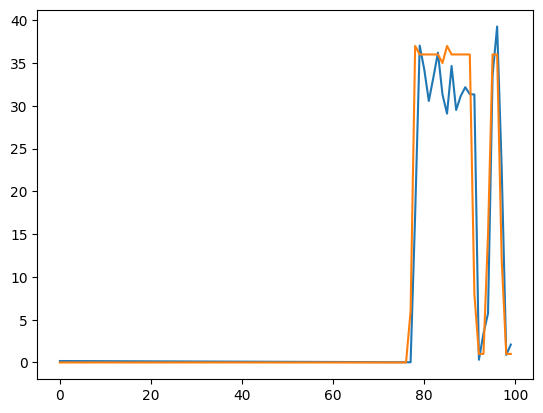

In [81]:
plot_predictions1(model4, X_test2, y_test2)

In [100]:
v_temp_df = pd.concat([df['Global_active_power'], temp_df], axis=1)
v_temp_df.head()

,Global_active_power,Sub_1,Day sin,Day cos,Year sin,Year cos
DateTime,,,,,,
2007-01-01 00:00:00,2.580,0.0,-7.946541e-13,1.000000,0.000473,1.0
2007-01-01 00:01:00,2.552,0.0,4.363309e-03,0.999990,0.000485,1.0
2007-01-01 00:02:00,2.550,0.0,8.726535e-03,0.999962,0.000497,1.0
2007-01-01 00:03:00,2.550,0.0,1.308960e-02,0.999914,0.000509,1.0
2007-01-01 00:04:00,2.554,0.0,1.745241e-02,0.999848,0.000521,1.0


In [101]:
def df_to_X_y3(df, window_size=7):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = [df_as_np[i+window_size][0], df_as_np[i+window_size][1]]
    y.append(label)
  return np.array(X), np.array(y)

In [102]:
X3, y3 = df_to_X_y3(v_temp_df)
X3.shape, y3.shape

((256862, 7, 6), (256862, 2))

In [103]:
X_train3, y_train3 = X3[:180000], y3[:180000]
X_val3, y_val3 = X3[180000:220000], y3[180000:220000]
X_test3, y_test3 = X3[220000:], y3[220000:]
X_train3.shape, y_train3.shape, X_val3.shape, y_val3.shape, X_test3.shape, y_test3.shape

((180000, 7, 6),
 (180000, 2),
 (40000, 7, 6),
 (40000, 2),
 (36862, 7, 6),
 (36862, 2))

In [104]:
p_training_mean3 = np.mean(X_train3[:, :, 0])
p_training_std3 = np.std(X_train3[:, :, 0])

temp_training_mean3 = np.mean(X_train3[:, :, 1])
temp_training_std3 = np.std(X_train3[:, :, 1])

def preprocess3(X):
  X[:, :, 0] = (X[:, :, 0] - p_training_mean3) / p_training_std3
  X[:, :, 1] = (X[:, :, 1] - temp_training_mean3) / temp_training_std3

def preprocess_output3(y):
  y[:, 0] = (y[:, 0] - p_training_mean3) / p_training_std3
  y[:, 1] = (y[:, 1] - temp_training_mean3) / temp_training_std3
  return y

In [105]:
preprocess3(X_train3)
preprocess3(X_val3)
preprocess3(X_test3)

In [106]:
preprocess_output3(y_train3)
preprocess_output3(y_val3)
preprocess_output3(y_test3)

array([[ 0.0895327 , -0.19181572],
       [ 0.09114235, -0.19181572],
       [ 0.08309407, -0.19181572],
       ...,
       [ 1.28872748, -0.19181572],
       [ 1.1100555 , -0.19181572],
       [ 1.01991469, -0.19181572]])

In [107]:
model5 = Sequential()
model5.add(InputLayer((7, 6)))
model5.add(LSTM(64))
model5.add(Dense(8, 'relu'))
model5.add(Dense(2, 'linear'))

model5.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 64)                18176     
                                                                 
 dense_10 (Dense)            (None, 8)                 520       
                                                                 
 dense_11 (Dense)            (None, 2)                 18        
                                                                 
Total params: 18714 (73.10 KB)
Trainable params: 18714 (73.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [108]:
cp5 = ModelCheckpoint('model5/', save_best_only=True)
model5.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [109]:
model5.fit(X_train3, y_train3, validation_data=(X_val3, y_val3), epochs=10, callbacks=[cp5])

Epoch 1/10
5625/5625 [==============================] - 39s 7ms/step - loss: 0.1962 - root_mean_squared_error: 0.4429 - val_loss: 0.1428 - val_root_mean_squared_error: 0.3779
Epoch 2/10
5625/5625 [==============================] - 35s 6ms/step - loss: 0.0996 - root_mean_squared_error: 0.3157 - val_loss: 0.1255 - val_root_mean_squared_error: 0.3542
Epoch 3/10
5625/5625 [==============================] - 38s 7ms/step - loss: 0.0917 - root_mean_squared_error: 0.3028 - val_loss: 0.1165 - val_root_mean_squared_error: 0.3413
Epoch 4/10
5625/5625 [==============================] - 36s 6ms/step - loss: 0.0882 - root_mean_squared_error: 0.2970 - val_loss: 0.1129 - val_root_mean_squared_error: 0.3361
Epoch 5/10
5625/5625 [==============================] - 36s 6ms/step - loss: 0.0861 - root_mean_squared_error: 0.2935 - val_loss: 0.1103 - val_root_mean_squared_error: 0.3321
Epoch 6/10
5625/5625 [==============================] - 36s 6ms/step - loss: 0.0847 - root_mean_squared_error: 0.2910 - val_l

In [131]:
def plot_predictions2(model, X, y, start=0, end=100):
  predictions = model.predict(X)
  p_preds, temp_preds = predictions[:, 0], predictions[:, 1]
  p_actuals, temp_actuals = y[:, 0], y[:, 1]
  df = pd.DataFrame(data={'Submetering sec 1 Predictions': temp_preds,
                          'Submetering sec 1 Actuals':temp_actuals,
                          'Global Active Power Predictions': p_preds,
                          'Global Active Power Actuals': p_actuals
                          })
  plt.plot(df['Submetering sec 1 Predictions'][start:end], label='Predictions SUBM', color='blue')
  plt.plot(df['Submetering sec 1 Actuals'][start:end], label='Actuals SUBM', color='orange')
  plt.plot(df['Global Active Power Predictions'][start:end], label='Predictions GAP', color='green')
  plt.plot(df['Global Active Power Actuals'][start:end], label='Actuals GAP', color='red')

  print("\nSUBMETERING 1 predictions : ", predictions[:, 1])
  print("GLOBAL ACTIVE POWER predictions : ",predictions[: , 0])
  print("\n\n")
  return df[start:end]

1152/1152 [==============================] - 4s 3ms/step

SUBMETERING 1 predictions :  [-0.20935385 -0.20967385 -0.20923914 ... -0.09898537 -0.10175538
 -0.12109566]
GLOBAL ACTIVE POWER predictions :  [0.07793847 0.0715479  0.07644823 ... 1.05352    1.0756876  0.9152485 ]





,Submetering sec 1 Predictions,Submetering sec 1 Actuals,Global Active Power Predictions,Global Active Power Actuals
0,-0.209354,-0.191816,0.077938,0.089533
1,-0.209674,-0.191816,0.071548,0.091142
2,-0.209239,-0.191816,0.076448,0.083094
3,-0.209868,-0.191816,0.071430,0.078265
4,-0.209652,-0.191816,0.068245,0.081484
...,...,...,...,...
95,5.642886,5.340683,1.521710,0.916897
96,2.994331,1.652350,0.314567,-0.349904
97,0.012480,-0.038135,-0.780428,-0.782902
98,0.100824,-0.038135,-0.404789,-0.602620


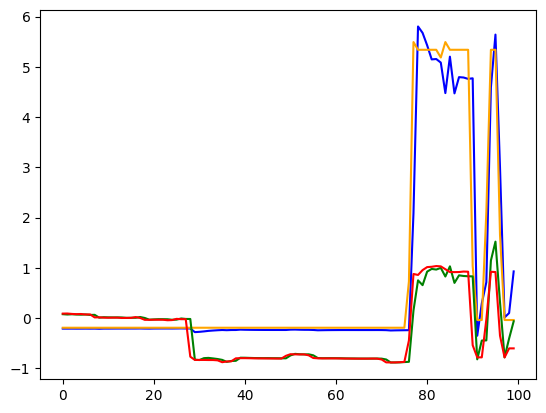

In [132]:
plot_predictions2(model5, X_test3, y_test3)